# Compare China overall to region Hubei


In [1]:
import pandas as pd
df = pd.read_csv('data/03-02-2020.csv')
df = df.drop(columns=['Last Update', 'Latitude', 'Longitude'])

groups = df.groupby(['Country/Region'])


## Just get Mainland China
As I want to take a look at china, other countries could be ignored

In [2]:
china = groups.get_group('Mainland China')

Get Information about confirmed infections from region Hubei and add aggregated confrmed infection from china in total. 

Add the overall number to the working datafram of hubei.

In [3]:
hubei = china[china['Province/State'] == 'Hubei'][['Province/State','Confirmed']]
overall = china[['Province/State','Confirmed']]
overall = overall.sum()

hubei['Overall'] = overall['Confirmed']

## Finally plot a simple bar chart

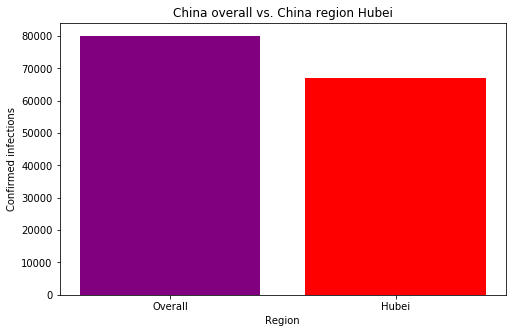

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

ax = plt.gca()
plt.xlabel('Region')
plt.ylabel('Confirmed infections')

# ugly, but it works...
plt.bar(['Overall', 'Hubei'], [hubei['Overall'][0],hubei['Confirmed'][0]], color=['purple', 'red'])
plt.title('China overall vs. China region Hubei')

plt.savefig('china_hubei.png', dpi=300)

plt.show()

